In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Imort dataset

In [2]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples = 1000,centers = 3,n_features = 2,random_state = 23)

In [3]:
x.shape

(1000, 2)

#### Visualize The data

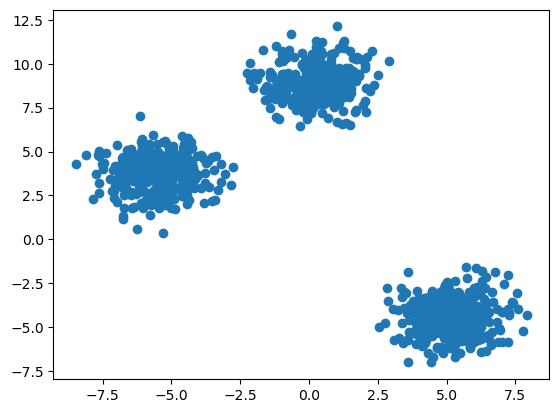

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
x = scaler.fit_transform(x)

#### Training the module

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [9]:
wcss

[2000.0000000000005,
 499.9451882415969,
 80.2994802166004,
 70.93826064006022,
 64.39810183952913,
 54.470442362243844,
 52.25015728273747,
 40.12459527605652,
 35.89654167762665,
 32.6048594854573]

In [10]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

kl.elbow
# If our wcss value will be "increases" then we use "concave"
# If our wcss value will be "decreases" then we use "convex"

3

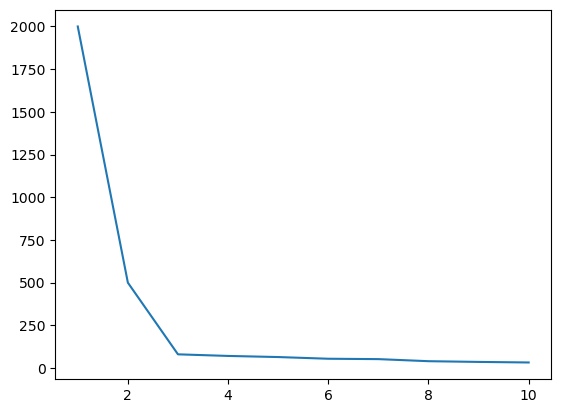

In [11]:
plt.plot(range(1,11),wcss)

In [12]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [13]:
y_labels = kmeans.fit_predict(x)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


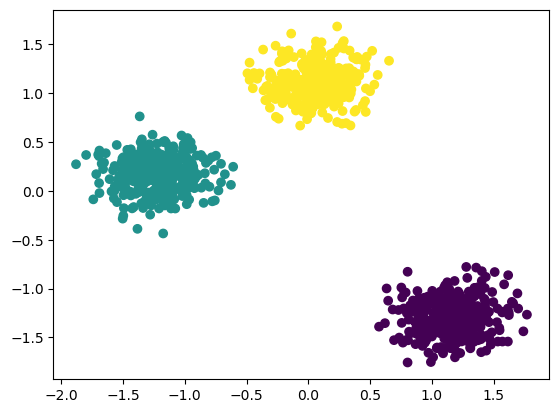

In [14]:
plt.scatter(x[:,0],x[:,1],c=y_labels)

#### Silhoutte Score

In [15]:
# Performance metrics
# Silhoutte score
from sklearn.metrics import silhouette_score

In [16]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = 3, init = "k-means++")
    kmeans.fit(x)
    score = silhouette_score(x,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [17]:
max(silhouette_coefficients)

0.8061084482498836

**At the 3 our silhoutte coefficients is 80% and it's high.**

### **Testing the model**

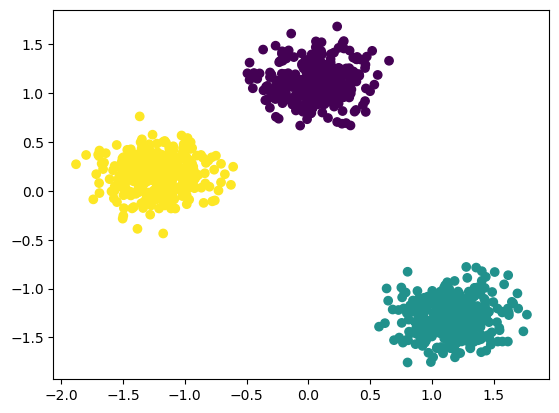

In [18]:
# Our output will be this
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()